# Part II - (Ford GoBike system Exploration)
## by Verah Angwenyi

## Investigation Overview

> In this analysis, I wanted to look at how the duration of trips varies depending on gender, time and the type of user. Hours of the day, days of the week will also be used in the analysis

## Dataset Overview

> The dataset contains 183412 fordgobike trips with the following 14 specifications: duration sec, start time, end time, start station id, start station name, start station latitude, start station longitude, bike id, user type and bike share for all trip.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# load dataset
ford_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# drop null values

ford_df.dropna(inplace=True)

# change data type
ford_df['start_time'] = pd.to_datetime(ford_df['start_time'])
ford_df['end_time'] = pd.to_datetime(ford_df['end_time'])

ford_df['bike_id'] =ford_df["bike_id"].astype(str)

# Create new columns
# start time
ford_df['start_month'] = ford_df["start_time"].dt.month_name()
ford_df['start_day'] = ford_df["start_time"].dt.day_name() 
ford_df['start_hour'] =ford_df["start_time"].dt.hour

# from end_time
ford_df['end_month'] = ford_df["start_time"].dt.month_name()
ford_df['end_day'] = ford_df["start_time"].dt.day_name()
ford_df['end_hour'] = ford_df["end_time"].dt.hour

In [4]:
ordinal_var_dict = {'start_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
                    'end_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'] }

nominal_var_dict = {'user_type': ['Customer','Subscriber'],
                    'member_gender': ['Male', 'Female', 'Other']}


for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    ford_df[var] = ford_df[var].astype(ordered_var)

for var in nominal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = nominal_var_dict[var])
    ford_df[var] = ford_df[var].astype(ordered_var) 

### User Type Distribution in Bike Trips

> Subscribers make up majority of the bike users with 90.5% percentage while the number of frequent customers is a 9.5% 

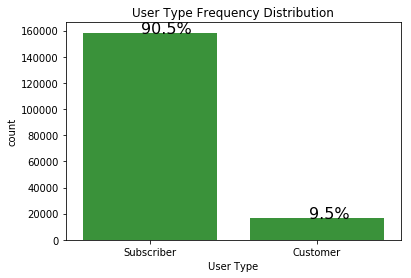

In [5]:
base_color = sb.color_palette()[2]
ax = sb.countplot(data = ford_df, x = 'user_type',  color= base_color, order=ford_df.user_type.value_counts().index)
    
total = len(ford_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 16)
plt.xlabel('User Type')
plt.title('User Type Frequency Distribution');

### Member Gender Distribution in Trips

> Men make more bike trips (74.6%) while the other gender makes the least number of trips at 2.1%

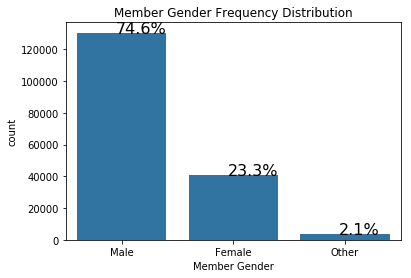

In [6]:
ax = sb.countplot(data = ford_df, x = 'member_gender',  color=sb.color_palette()[0], order=ford_df.member_gender.value_counts().index)
    
total = len(ford_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 16)
plt.xlabel('Member Gender')
plt.title('Member Gender Frequency Distribution');

### Distribution of Trips across the Week

>  The day of the week with a biggest number of trips made in a day is on Thursday followed by Tuesday and Friday

> The least number of trips per day majored on saturdays and sunday

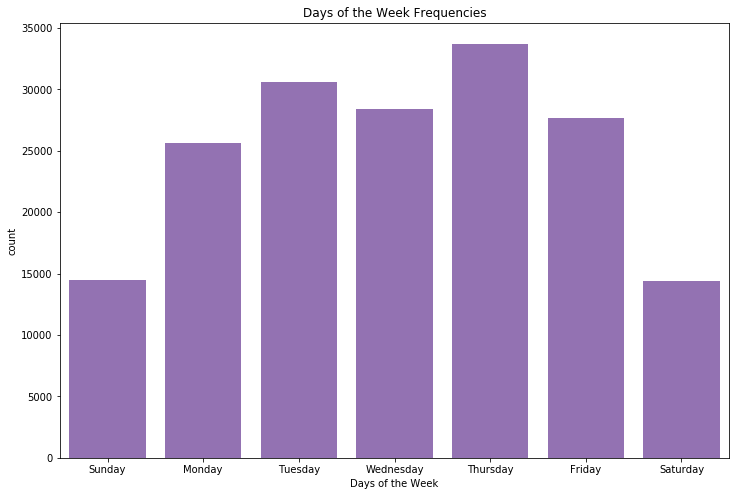

In [7]:
base_color = sb.color_palette()[4]

plt.figure(figsize = (12,8))
sb.countplot(data = ford_df, x = 'start_day', color = base_color)
plt.xlabel('Days of the Week')
plt.title('Days of the Week Frequencies');

### Analysis of User Type Vs Gender and Bike share Distribution

> Only subscribers share bikes. Its clear that bike sharing is not a common practice amongst the riders

> Subscribers make up a bigger portion of the user type with a big margin

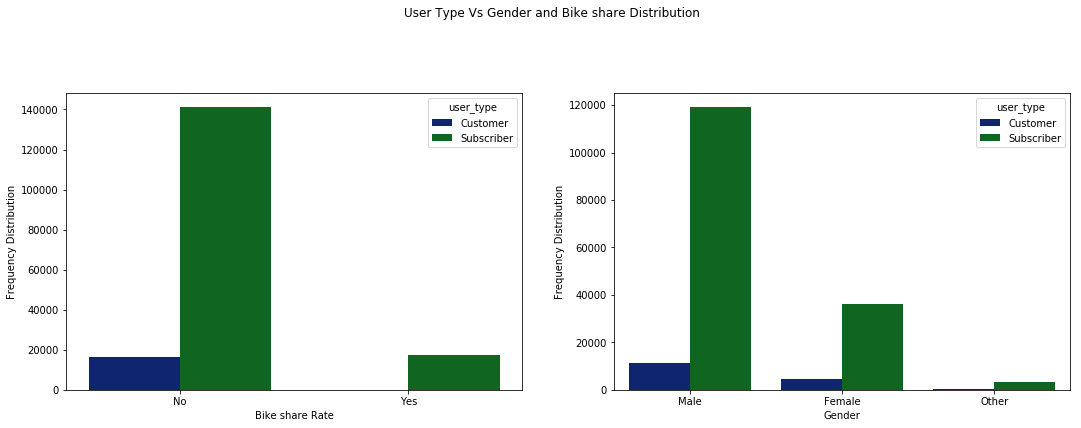

In [8]:
palette = sb.color_palette("dark")
sb.set_palette("dark")

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize = [18,12])
plt.suptitle('User Type Vs Gender and Bike share Distribution')

ax1 = plt.subplot(2,2,1)
ax1=sb.countplot(data =ford_df, x ='bike_share_for_all_trip', hue = 'user_type')
ax1= plt.xlabel('Bike share Rate')
ax1= plt.ylabel('Frequency Distribution')

ax2 = plt.subplot(2,2,2)
ax2=sb.countplot(data = ford_df, x = 'member_gender', hue = 'user_type')
ax2= plt.xlabel("Gender")
ax2= plt.ylabel('Frequency Distribution')


### Conclusion

* On weekdays, Subscribers tend to go for trips more frequently and consistently than on weekends while the number of customers has rises on weekends starting friday, while it has decreased on Sundays. During peak hours, bicycle trips are most often used

* In comparison to subscribers, user types that are customers typically travel for longer periods of time

* The subscribers are more consistent with their trip duration with majority of the rides being made during  weekdays.

* Customer make longer trips in terms of time taken more than the subscribers

* The day of the week with a big number of trips taken is Thursday followed by Tuesday and Friday

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 361410 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
